In [101]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("UKandUS.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
df['time_created'] = df['created_utc'].apply(lambda x: str(datetime.utcfromtimestamp(x)).split()[1])
df.head()

,id,author,submission,body,subreddit,created_utc,collected_utc,time_created
0,t3_1834bpq,Championnats91,kao3hv7,Quality coffee and fancy chocolate. Can’t go w...,AskUK,1.700895e+09,1.700895e+09,06:56:57
1,t3_182y2il,ProfitTheProphet,kao3i5j,It was smoked a lot more widely than I think y...,AskAnAmerican,1.700895e+09,1.700895e+09,06:57:03
2,t3_182ychd,Stuspawton,kao3jjy,"I’m over two and a half years sober now, so I ...",AskUK,1.700895e+09,1.700895e+09,06:57:31
3,t3_18329v6,IngerasulBihorului,kao3kh2,2 DualSense Controllers(one of them didnt arri...,AskUK,1.700895e+09,1.700895e+09,06:57:50
4,t3_1834bpq,Kittlebeanfluff,kao3os8,Cocaine then.,AskUK,1.700896e+09,1.700896e+09,06:59:17


### Question 1.2

### Part 1

In [103]:
def tumbling(x):
    twentymin = [20, 40, 60]
    for i in twentymin:
        if int(x) < i:
            return i / 10
    return 0

In [104]:
def hopping(x):
    fivemins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
    for i in fivemins:
        if int(x) < i:
            return (i / 5)
    return 0

In [105]:
def get_unique_author(df, x, y):
    for i in x:
        eachtime = df.loc[df['20min_category'] == i]
        numberunique = len(eachtime['author'].unique())
        y.append(numberunique)

In [106]:
def get_five_cats(df, times, x):
    for i in times:
        results = df.loc[df["5min_category"] == i]
        x.append(results['author'].count())

In [107]:
def get_twenty_cat(twenty, five):
    for i in range(len(five)):
        if i+4 == len(five):
            break
        twenty.append(sum(five[i:i+4]))

In [108]:
mins = df['time_created'].apply(lambda x: x.split(":")[1])
hours = df['time_created'].apply(lambda x: x.split(":")[0])

df['20min_category'] = hours.apply(lambda x: float(x)) + mins.apply(tumbling) / 10
df['5min_category'] = hours.apply(lambda x: float(x)) + mins.apply(hopping) / 100

In [109]:
# hopping window

dfUS = df[df['subreddit'] == "AskAnAmerican"]
dfUK = df[df['subreddit'] == "AskUK"]

xUS = dfUS['20min_category'].unique()
xUK = dfUK['20min_category'].unique()

yUS = []
yUK = []

get_unique_author(dfUK, xUK, yUK)
get_unique_author(dfUS, xUS, yUS)

In [110]:
# sliding window

mintimesUK = dfUK['5min_category'].unique()
mintimesUS = dfUS['5min_category'].unique()

UKfive = []
USfive = []

UKtwentys = []
UStwentys = []

get_five_cats(dfUK, mintimesUK, UKfive)
get_five_cats(dfUS, mintimesUS, USfive)

get_twenty_cat(UKtwentys, UKfive)
get_twenty_cat(UStwentys, USfive)

unique UK users per 20 minutes tumbling window


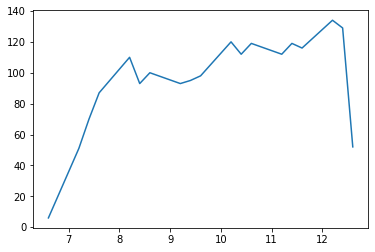

unique US users per 20 minutes tumbling window


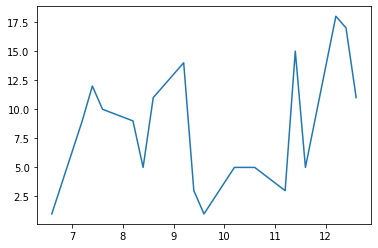

In [111]:
print("unique UK users per 20 minutes tumbling window")
plt.plot(xUK, yUK)
plt.show()

print("unique US users per 20 minutes tumbling window")
plt.plot(xUS, yUS)
plt.show()

unique UK users per 20 minutes with 5 minute over lap window


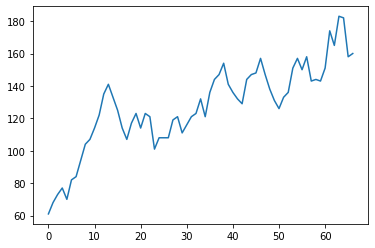

unique US users per 20 minutes with 5 minute over lap window


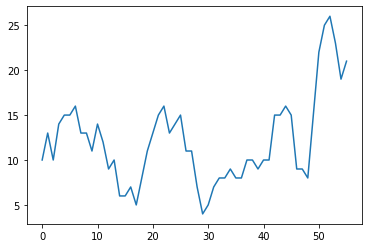

In [112]:
print("unique UK users per 20 minutes with 5 minute over lap window")
plt.plot(UKtwentys)
plt.show()

print("unique US users per 20 minutes with 5 minute over lap window")
plt.plot(UStwentys)
plt.show()

# -----------change the axis to make sense-------------

Q: Comment upon the differences you observed in the data comparing the two subreddits.

A: The sliding window displays a more current update of active unique users in each subreddit; a more continuous representation of the comments being posted. The data was collected at 7am-12pm UK time therefore displays an increase of activity in the morning in the AskUK subreddit compared to low activity in AskAnAmerican subreddit which  would be asleep for the majority of the time data collected.

### Part 2

In [113]:
def count_word(x):
    return len(x.split())

In [114]:
df['numWord'] = df['body'].apply(lambda x: count_word(x))

In [115]:
df.head()

,id,author,submission,body,subreddit,created_utc,collected_utc,time_created,20min_category,5min_category,numWord
0,t3_1834bpq,Championnats91,kao3hv7,Quality coffee and fancy chocolate. Can’t go w...,AskUK,1.700895e+09,1.700895e+09,06:56:57,6.6,6.12,15
1,t3_182y2il,ProfitTheProphet,kao3i5j,It was smoked a lot more widely than I think y...,AskAnAmerican,1.700895e+09,1.700895e+09,06:57:03,6.6,6.12,119
2,t3_182ychd,Stuspawton,kao3jjy,"I’m over two and a half years sober now, so I ...",AskUK,1.700895e+09,1.700895e+09,06:57:31,6.6,6.12,12
3,t3_18329v6,IngerasulBihorului,kao3kh2,2 DualSense Controllers(one of them didnt arri...,AskUK,1.700895e+09,1.700895e+09,06:57:50,6.6,6.12,37
4,t3_1834bpq,Kittlebeanfluff,kao3os8,Cocaine then.,AskUK,1.700896e+09,1.700896e+09,06:59:17,6.6,6.12,2
